# Expansiones basales

## Problema 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from pygam import LinearGAM

df = pd.read_csv('compresive_strength_concrete.csv')

warnings.filterwarnings(action='ignore')

plt.style.use('seaborn')                
plt.rcParams['figure.figsize'] = (15,20) 

In [2]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


La variable Age, Fly Ash y Blast Furnace , poseen una mayor DS, que el valor de su media, por lo tanto es probable que tenga los datos muy dispersos.

El atributo Fly Ash, tiene los datos más agrupados sobre el rango Q3.

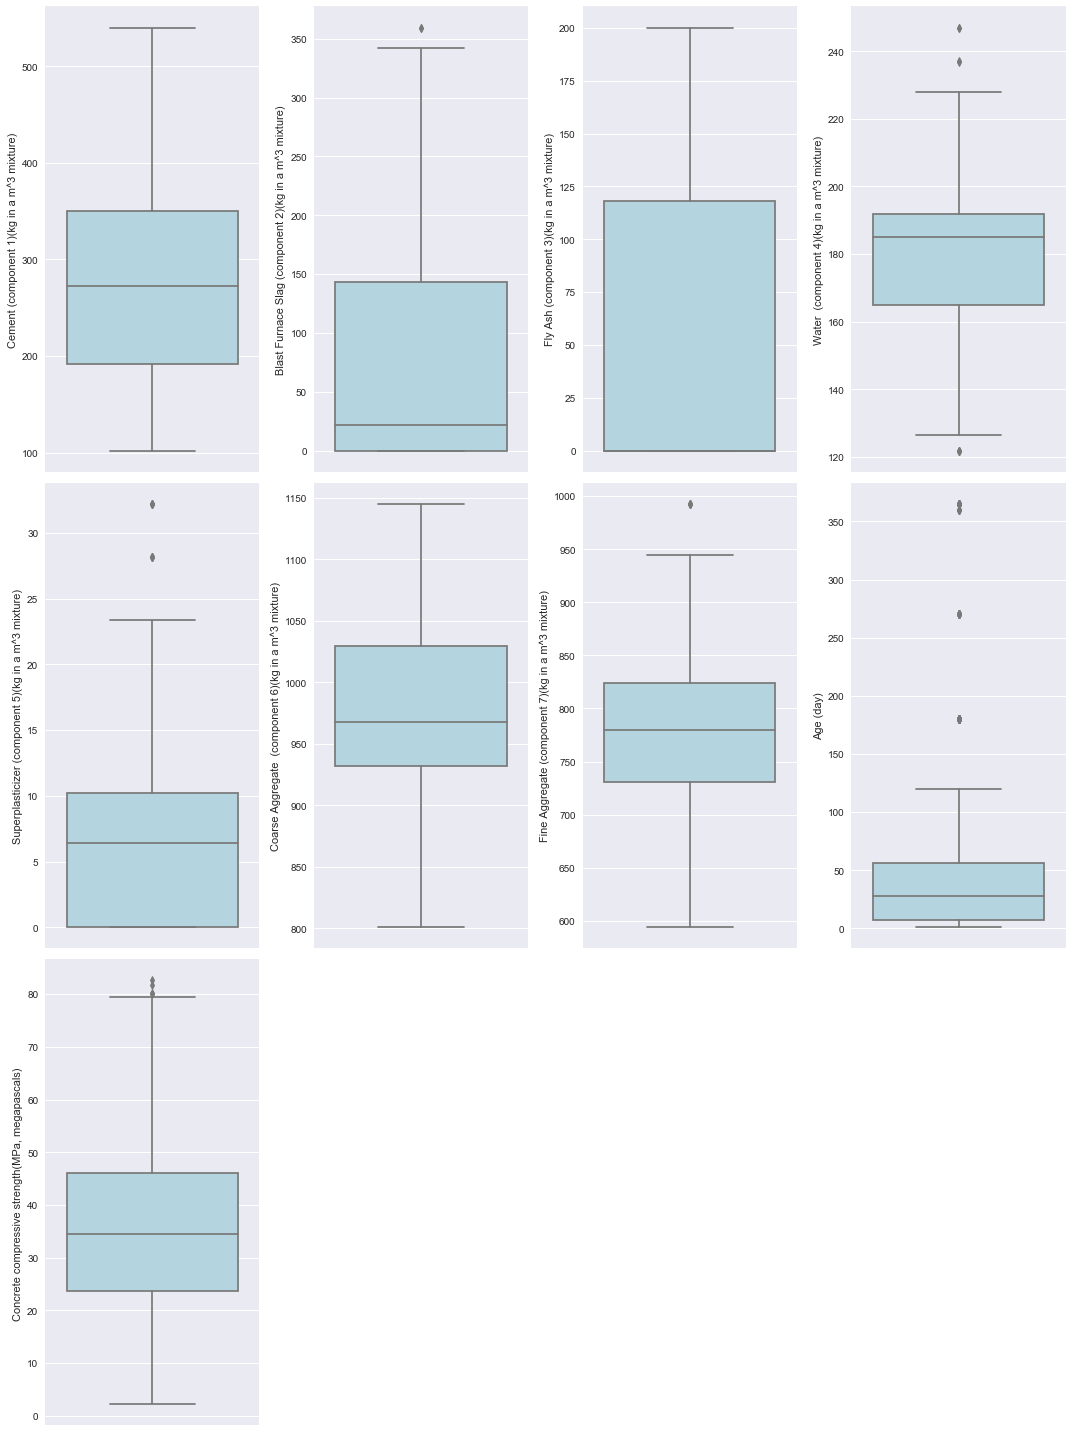

In [4]:
for n, i in enumerate(df):
    plt.subplot(3, 4, n+1)
    sns.boxplot(df[i], orient='v', color='lightblue')
    
plt.tight_layout()

Se observa en los gráficos, que hay pocos atributos con outliers. Age, Water y Superplasticizer, son los atributos que tienen los puntos fuera de serie, más alejados.

El atributo age, tiene los datos distribuidos de manerca más cercana en entre los percentiles 25% a 75%, lo que hace ver más estrecha la "caja".

La variable Flyash, no posee una mediana, lo cual se relaciona con los datos de la tabla, en la cual hay muchos datos con valor de 0.

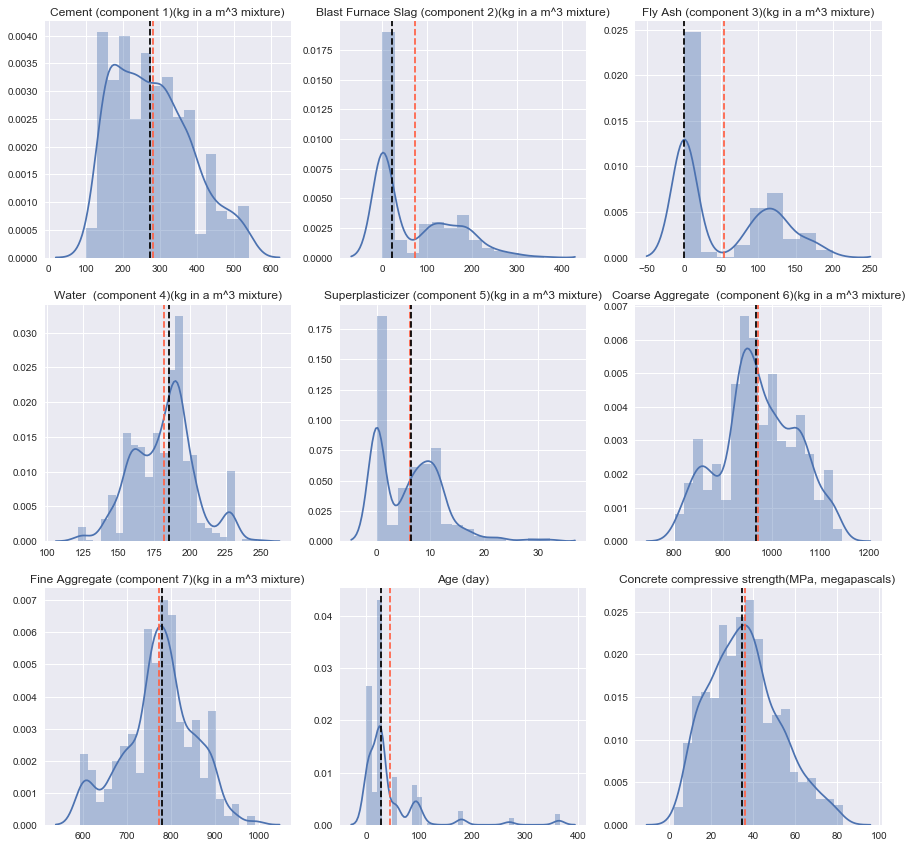

In [5]:
for n, i in enumerate(df):
    plt.subplot(4, 3, n+1)
    sns.distplot(df[i])
    plt.axvline(df[i].mean(),color='tomato', linestyle='--')
    plt.axvline(df[i].median(),color='black', linestyle='--')
    plt.title(i)
    plt.xlabel("")

Se corrobora que la mediana de Ash se ubica en 0, debido a que gran parte de sus datos tienen este valor. 

Los atributos Fly Ash y Blast Furnace, se encuentran levemente sesgados hacia la derecha. 

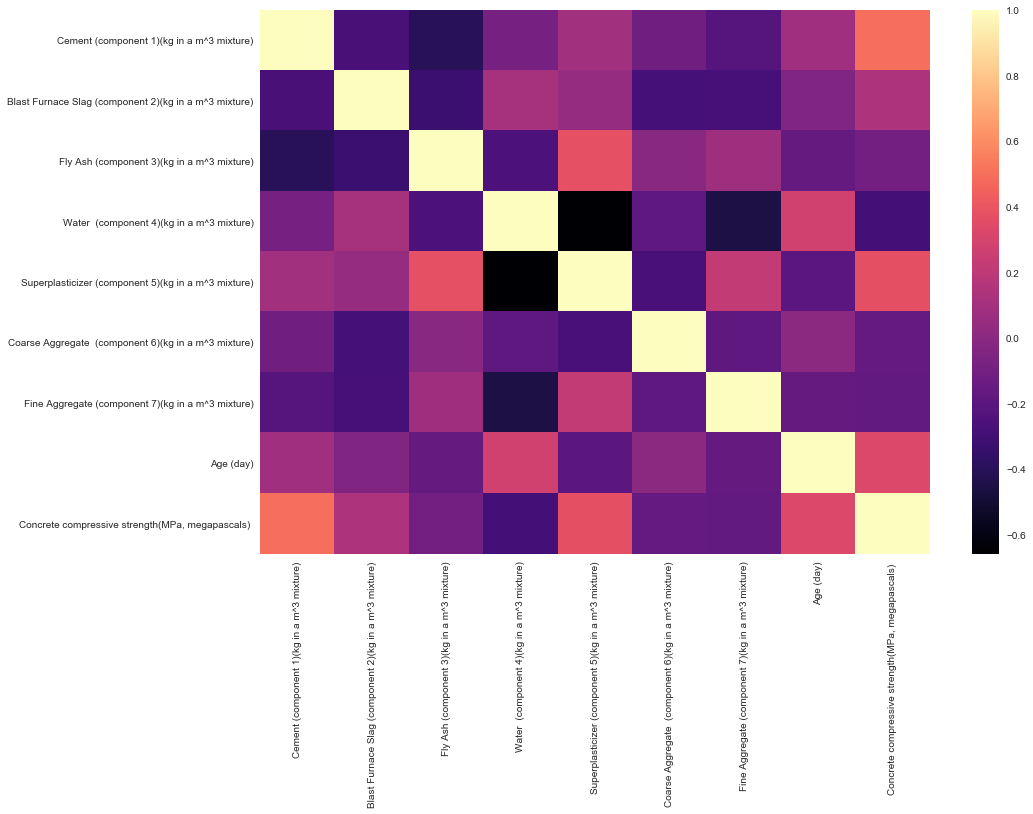

In [6]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),cmap='magma',linecolor='white')

Se puede observar que la más importante correlación positiva de la variable objetivo, es con el atributo Cement.

## Problema 2 

In [17]:
df.columns = df.columns.str.replace(' ','_')

In [18]:
columns_name={'Cement_(component_1)(kg_in_a_m^3_mixture)': 'Cement',
       'Blast_Furnace_Slag_(component_2)(kg_in_a_m^3_mixture)': 'Blast',
       'Fly_Ash_(component_3)(kg_in_a_m^3_mixture)':'Fly',
       'Water__(component_4)(kg_in_a_m^3_mixture)':'Water',
       'Superplasticizer_(component_5)(kg_in_a_m^3_mixture)':'SPlazti',
       'Coarse_Aggregate__(component_6)(kg_in_a_m^3_mixture)':'Coarse',
       'Fine_Aggregate_(component_7)(kg_in_a_m^3_mixture)':'Fine', 'Age_(day)':'Age',
       'Concrete_compressive_strength(MPa,_megapascals)_':'Concrete'}

In [19]:
df.rename(columns = columns_name, inplace=True)

## Problema 3

In [20]:
def report_gam_metrics(model, X_test, y_test):
    print('MÉTRICAS DEL MODELO')
    print('Test R^2 accuracy:\t {0}'.format(r2_score(y_test,model.predict(X_test)).round(3)))
    print('Test RMSE accuracy:\t {0}\n'.format(np.sqrt(mean_squared_error(y_test,model.predict(X_test))).round(3)))

In [21]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df['Concrete'], test_size=.33, random_state=1450)

In [22]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [23]:
linear_gam = LinearGAM(lam=1e-03).fit(X_train, y_train)

Se utilizó un valor lamba, de 0.001.

In [31]:
search_params = {'lam': np.logspace(-3, 3, 100)}

In [32]:
grid_gam = LinearGAM().gridsearch(X_train, y_train,**search_params)

100% (100 of 100) |######################| Elapsed Time: 0:00:04 Time:  0:00:04


In [33]:
grid_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     93.2639
Link Function:                     IdentityLink Log Likelihood:                                 -2818.6056
Number of Samples:                          690 AIC:                                              5825.739
                                                AICc:                                             5855.937
                                                GCV:                                               30.6229
                                                Scale:                                             23.2759
                                                Pseudo R-Squared:                                   0.9291
Feature Function                  Lam

In [34]:
linear_gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                    127.6736
Link Function:                     IdentityLink Log Likelihood:                                 -2779.2488
Number of Samples:                          690 AIC:                                             5815.8447
                                                AICc:                                            5875.4013
                                                GCV:                                               32.6372
                                                Scale:                                             21.9864
                                                Pseudo R-Squared:                                   0.9369
Feature Function                  Lam

Se puede observar que las variables de los modelos: linear_gam y grid_gam son significativas, sin grandes variaciones en los exponentes.

In [35]:
report_gam_metrics(linear_gam, X_test, y_test)
report_gam_metrics(grid_gam, X_test, y_test)

MÉTRICAS DEL MODELO
Test R^2 accuracy:	 0.712
Test RMSE accuracy:	 8.792

MÉTRICAS DEL MODELO
Test R^2 accuracy:	 0.757
Test RMSE accuracy:	 8.071



Se puede observar que el modelo grid_gam, posee un mejor desempeño que el linear_gam, debido a que sus datos poseen una menor cantidad de (RMSE).

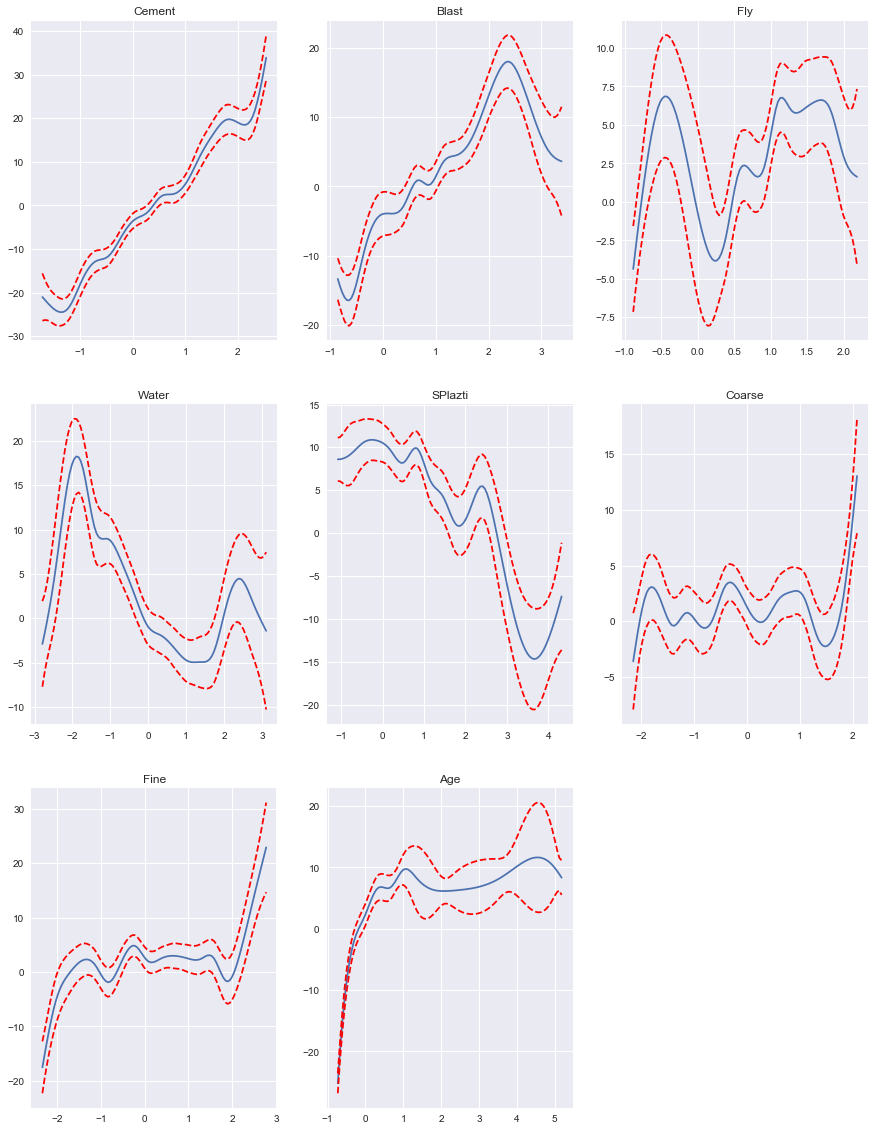

In [36]:
titles = ['Cement', 'Blast', 'Fly', 'Water', 'SPlazti', 'Coarse', 'Fine', 'Age']

for i, term in enumerate(grid_gam.terms):
    if term.isintercept:
        continue  
    XX = grid_gam.generate_X_grid(term=i)
    pdep, confi = grid_gam.partial_dependence(term=i, X=XX, width=0.95)
    plt.subplot(3,3,i+1)
    plt.plot(XX[:, term.feature], pdep)
    plt.plot(XX[:, term.feature], confi, c='r', ls='--')
    plt.title(titles[i])

Se puede observar, que a medida que la fuerza compresiva del concreto (MpA), aumenta cuando aumentar los atributos: Concrete, Coarse Aggregate y Fine Aggregate. Por otra parte, disminuye la fuerza compresiva del concreto con los atributos: Water y Superplasticizer (ambas en unidades de Kg m^3 de mezcla).